In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# SimpleRNN

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

max_features = 20000
maxlen = 80
batch_size = 32

print("Loading data...")
(X_train , y_train) , (X_test , y_test) = imdb.load_data(num_words = max_features)
print(len(X_train) , "train sequences")
print(len(X_test) , "test , sequences")

Loading data...
25000 train sequences
25000 test , sequences


In [0]:
print("Pad sequences (samples X time)")
X_train = sequence.pad_sequences(X_train , maxlen=maxlen)
X_test = sequence.pad_sequences(X_test , maxlen=maxlen)
print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)

print("Build model...")
model = Sequential()
model.add(Embedding(max_features , 128))
model.add(SimpleRNN(128 , dropout=0.2 , recurrent_dropout=0.2))
model.add(Dense(1 , activation="sigmoid"))

print(model.summary())

Pad sequences (samples X time)
X_train shape :  (25000, 80)
X_test shape :  (25000, 80)
Build model...
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss="binary_crossentropy" , 
             optimizer="adam" , 
             metrics=["accuracy"])

print("Train...")
model.fit(X_train , y_train , 
         batch_size=batch_size , 
         epochs = 5 , 
         validation_data = (X_test , y_test))
score , acc = model.evaluate(X_test , y_test  , 
                            batch_size=batch_size)
print("Test score : " , score)
print("Test accuracy : " , acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 201s 8ms/step - loss: 0.6830 - accuracy: 0.5540 - val_loss: 0.6134 - val_accuracy: 0.6902
Epoch 2/5
25000/25000 [==============================] - 182s 7ms/step - loss: 0.5512 - accuracy: 0.7160 - val_loss: 0.6155 - val_accuracy: 0.6475
Epoch 3/5
25000/25000 [==============================] - 173s 7ms/step - loss: 0.5345 - accuracy: 0.7289 - val_loss: 0.5955 - val_accuracy: 0.6841
Epoch 4/5
25000/25000 [==============================] - 173s 7ms/step - loss: 0.5324 - accuracy: 0.7319 - val_loss: 0.5359 - val_accuracy: 0.7411
Epoch 5/5
25000/25000 [==============================] - 26s 1ms/step
Test score :  0.5622755904579163
Test accuracy :  0.7249600291252136


# GRU

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Embedding
from keras.layers import GRU
from keras.datasets import imdb

max_features = 20000
maxlen = 80
batch_size = 32

print("Loading data...")
(X_train , y_train) , (X_test , y_test) = imdb.load_data(num_words = max_features)
print(len(X_train) , "train sequences")
print(len(X_test) , "test , sequences")

Loading data...
25000 train sequences
25000 test , sequences


In [0]:
print("Pad sequences (samples X time)")
X_train = sequence.pad_sequences(X_train , maxlen=maxlen)
X_test = sequence.pad_sequences(X_test , maxlen=maxlen)
print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)

print("Build model...")
model = Sequential()
model.add(Embedding(max_features , 128))
model.add(GRU(128 , dropout=0.2 , recurrent_dropout=0.2))
model.add(Dense(1 , activation="sigmoid"))

print(model.summary())

Pad sequences (samples X time)
X_train shape :  (25000, 80)
X_test shape :  (25000, 80)
Build model...
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss="binary_crossentropy" , 
             optimizer="adam" , 
             metrics=["accuracy"])

print("Train...")
model.fit(X_train , y_train , 
         batch_size=batch_size , 
         epochs = 5 , 
         validation_data = (X_test , y_test))
score , acc = model.evaluate(X_test , y_test  , 
                            batch_size=batch_size)
print("Test score : " , score)
print("Test accuracy : " , acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 405s 16ms/step - loss: 0.5039 - accuracy: 0.7535 - val_loss: 0.5237 - val_accuracy: 0.7412
Epoch 2/5
25000/25000 [==============================] - 405s 16ms/step - loss: 0.4917 - accuracy: 0.8004 - val_loss: 0.5361 - val_accuracy: 0.7186
Epoch 3/5
25000/25000 [==============================] - 420s 17ms/step - loss: 0.3213 - accuracy: 0.8718 - val_loss: 0.5322 - val_accuracy: 0.7303
Epoch 4/5
25000/25000 [==============================] - 415s 17ms/step - loss: 0.2505 - accuracy: 0.9090 - val_loss: 0.5641 - val_accuracy: 0.7199
Epoch 5/5
25000/25000 [==============================] - 70s 3ms/step
Test score :  0.6211218611526489
Test accuracy :  0.6984400153160095


# LSTM

https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80
batch_size = 48

print("Loading data...")
(X_train , y_train) , (X_test , y_test) = imdb.load_data(num_words = max_features)
print(len(X_train) , "train sequences")
print(len(X_test) , "test , sequences")

Loading data...
25000 train sequences
25000 test , sequences


In [0]:
print("Pad sequences (samples X time)")
X_train = sequence.pad_sequences(X_train , maxlen=maxlen)
X_test = sequence.pad_sequences(X_test , maxlen=maxlen)
print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)

print("Build model...")
model = Sequential()
model.add(Embedding(max_features , 128))
model.add(LSTM(128 , dropout=0.2 , recurrent_dropout=0.2))
model.add(Dense(50 , activation="sigmoid"))
model.add(Dense(1 , activation="sigmoid"))

print(model.summary())

Pad sequences (samples X time)
X_train shape :  (25000, 80)
X_test shape :  (25000, 80)
Build model...
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 2,698,085
Trainable params: 2,698,085
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss="binary_crossentropy" , 
             optimizer="adam" , 
             metrics=["accuracy"])

print("Train...")
model.fit(X_train , y_train , 
         batch_size=batch_size , 
         epochs = 10 , 
         validation_data = (X_test , y_test))
score , acc = model.evaluate(X_test , y_test  , 
                            batch_size=batch_size)
print("Test score : " , score)
print("Test accuracy : " , acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 383s 15ms/step - loss: 0.4662 - accuracy: 0.7767 - val_loss: 0.3685 - val_accuracy: 0.8364
Epoch 2/10
25000/25000 [==============================] - 371s 15ms/step - loss: 0.3051 - accuracy: 0.8789 - val_loss: 0.3891 - val_accuracy: 0.8273
Epoch 3/10
25000/25000 [==============================] - 338s 14ms/step - loss: 0.2335 - accuracy: 0.9110 - val_loss: 0.4107 - val_accuracy: 0.8334
Epoch 4/10
25000/25000 [==============================] - 400s 16ms/step - loss: 0.1695 - accuracy: 0.9373 - val_loss: 0.5138 - val_accuracy: 0.8220
Epoch 5/10
25000/25000 [==============================] - 379s 15ms/step - loss: 0.1271 - accuracy: 0.9557 - val_loss: 0.5089 - val_accuracy: 0.8238
Epoch 6/10
25000/25000 [==============================] - 382s 15ms/step - loss: 0.0975 - accuracy: 0.9667 - val_loss: 0.5726 - val_accuracy: 0.8103
Epoch 7/10
25000/25000 [=======================

# ConvLSTM2D

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

In [0]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40 , kernel_size=(3,3) , 
                  input_shape=(None , 40 , 40 , 1) , 
                  padding="same" , return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40 , kernel_size=(3,3) , 
                  padding="same" , return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40 , kernel_size=(3,3) , 
                  padding="same" , return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40 , kernel_size=(3,3) , 
                  padding="same" , return_sequences=True))

seq.add(BatchNormalization())

seq.add(Conv3D(filters=1 , kernel_size=(3,3,3) , 
              activation="sigmoid" ,
              padding="same" , data_format="channels_last"))

seq.compile(loss="binary_crossentropy" , optimizer="adadelta")

print(seq.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_9 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_9 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_10 (ConvLSTM2D) (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_10 (Batc (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_11 (ConvLSTM2D) (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_11 (Batc (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_12 (ConvLSTM2D) (None, None, 40, 40, 40) 

In [0]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [0]:
noisy_movies , shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:100] , shifted_movies[:100] , batch_size=20 , 
       epochs = 5 , validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/5
80/80 [==============================] - 179s 2s/step - loss: 0.6479 - val_loss: 0.6725
Epoch 2/5
80/80 [==============================] - 159s 2s/step - loss: 0.5366 - val_loss: 0.6652
Epoch 3/5
80/80 [==============================] - 156s 2s/step - loss: 0.4625 - val_loss: 0.6598
Epoch 4/5
80/80 [==============================] - 156s 2s/step - loss: 0.4261 - val_loss: 0.6494
Epoch 5/5
80/80 [==============================] - 157s 2s/step - loss: 0.3587 - val_loss: 0.6406


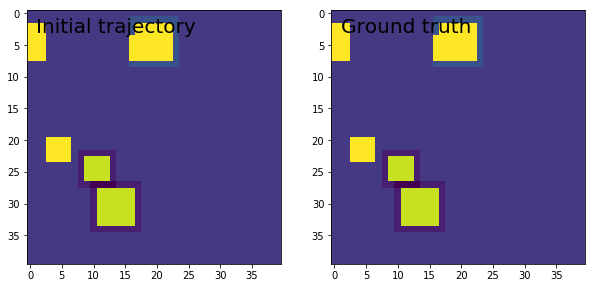

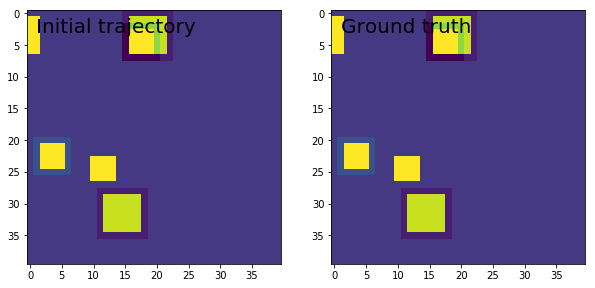

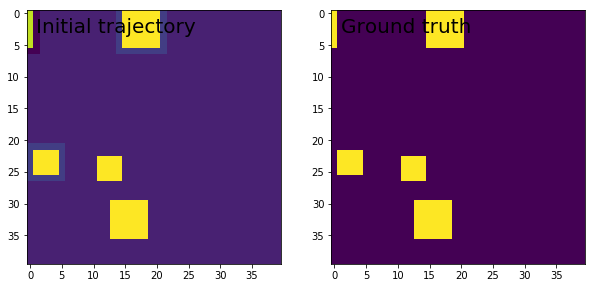

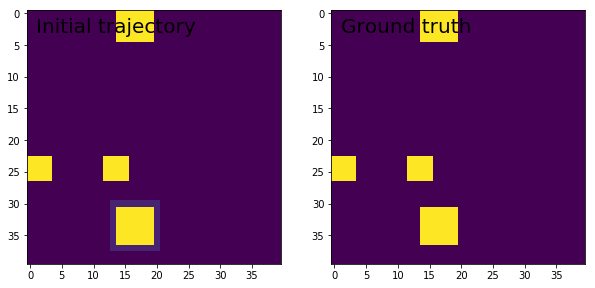

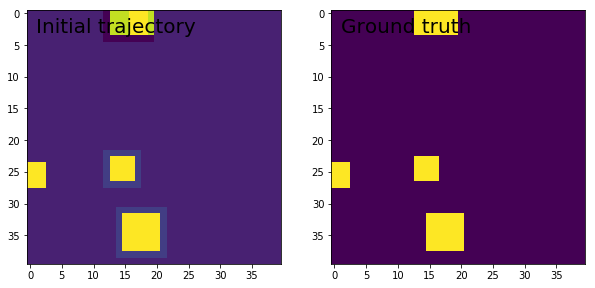

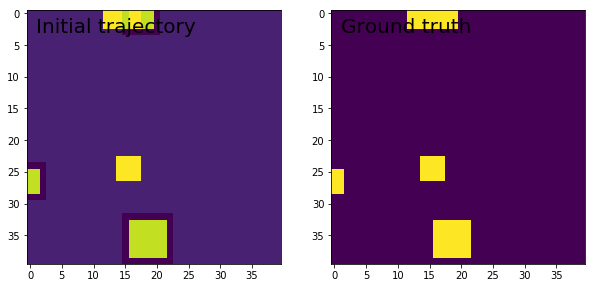

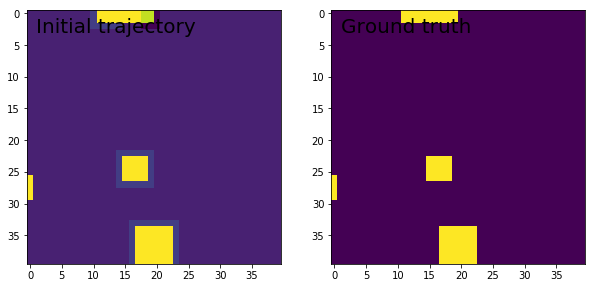

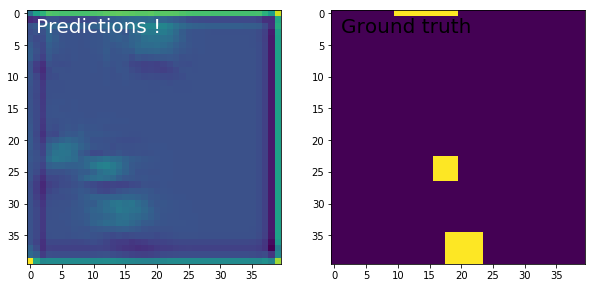

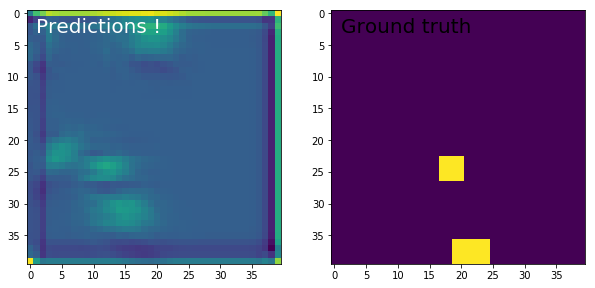

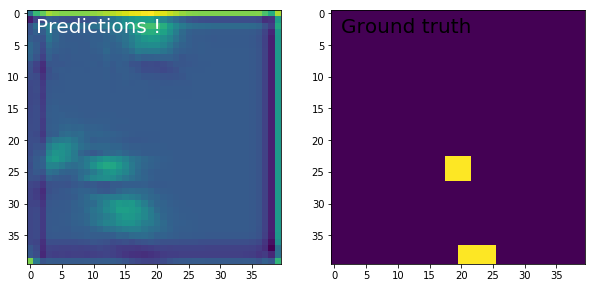

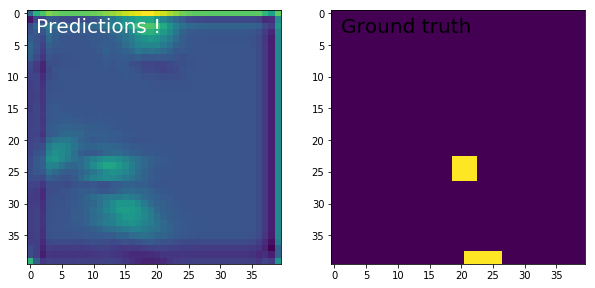

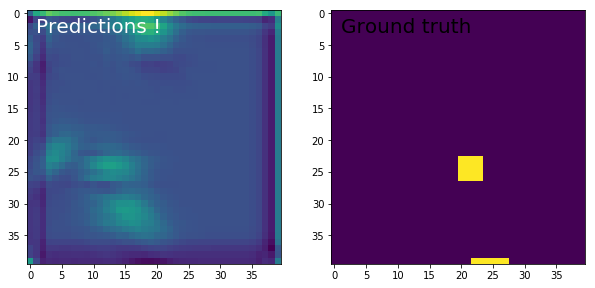

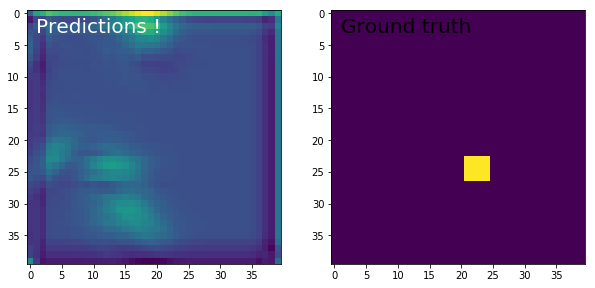

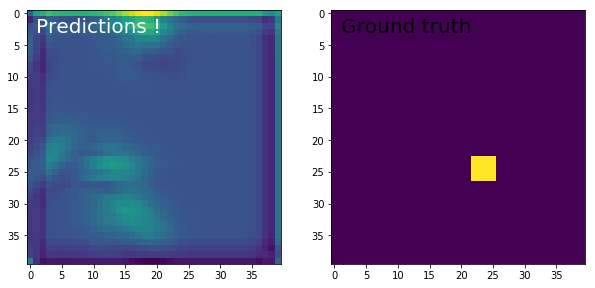

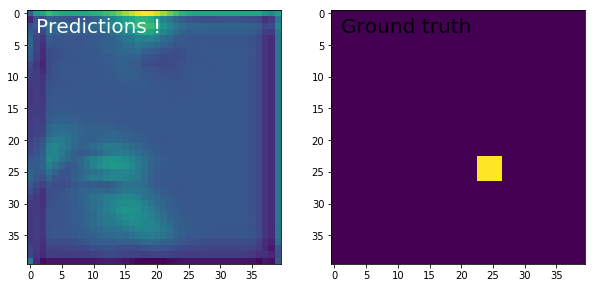

In [0]:
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題2】（アドバンス課題）複数のデータセット間での比較

In [35]:
with open("gingatetsudono_yoru.txt" , mode="r" , encoding="utf-8") as f:
    ginga = f.read()
    
print(ginga)

「ではみなさんは、そういうふうに川だと云《い》われたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。」先生は、黒板に吊《つる》した大きな黒い星座の図の、上から下へ白くけぶった銀河帯のようなところを指《さ》しながら、みんなに問《とい》をかけました。
　カムパネルラが手をあげました。それから四五人手をあげました。ジョバンニも手をあげようとして、急いでそのままやめました。たしかにあれがみんな星だと、いつか雑誌で読んだのでしたが、このごろはジョバンニはまるで毎日教室でもねむく、本を読むひまも読む本もないので、なんだかどんなこともよくわからないという気持ちがするのでした。
　ところが先生は早くもそれを見附《みつ》けたのでした。
「ジョバンニさん。あなたはわかっているのでしょう。」
　ジョバンニは勢《いきおい》よく立ちあがりましたが、立って見るともうはっきりとそれを答えることができないのでした。ザネリが前の席からふりかえって、ジョバンニを見てくすっとわらいました。ジョバンニはもうどぎまぎしてまっ赤になってしまいました。先生がまた云いました。
「大きな望遠鏡で銀河をよっく調べると銀河は大体何でしょう。」
　やっぱり星だとジョバンニは思いましたがこんどもすぐに答えることができませんでした。
　先生はしばらく困ったようすでしたが、眼《め》をカムパネルラの方へ向けて、
「ではカムパネルラさん。」と名指しました。するとあんなに元気に手をあげたカムパネルラが、やはりもじもじ立ち上ったままやはり答えができませんでした。
　先生は意外なようにしばらくじっとカムパネルラを見ていましたが、急いで「では。よし。」と云いながら、自分で星図を指《さ》しました。
「このぼんやりと白い銀河を大きないい望遠鏡で見ますと、もうたくさんの小さな星に見えるのです。ジョバンニさんそうでしょう。」
　ジョバンニはまっ赤になってうなずきました。けれどもいつかジョバンニの眼のなかには涙《なみだ》がいっぱいになりました。そうだ僕《ぼく》は知っていたのだ、勿論《もちろん》カムパネルラも知っている、それはいつかカムパネルラのお父さんの博士のうちでカムパネルラといっしょに読んだ雑誌のなかにあったのだ。それどこでなくカムパネルラは、その雑誌を読むと、すぐお父さんの書斎《しょさい》から巨《お

In [0]:
import re
import pickle

ginga = re.sub("《[^》]+》" , "" , ginga)
ginga = re.sub("[[^] ] +]" , "" , ginga)
ginga = re.sub("[｜ 　「」\n]", "" , ginga)

In [0]:
n_rnn = 10  # 時系列の数
batch_size = 128
epochs = 100
n_mid = 128  # 中間層のニューロン数

In [38]:
import numpy as np

# インデックスと文字で辞書を作成
chars = sorted(list(set(ginga)))  # setで文字の重複をなくし、各文字をリストに格納する
print("文字数（重複無し）", len(chars))
char_indices = {}  # 文字がキーでインデックスが値
for i, char in enumerate(chars):
    char_indices[char] = i
indices_char = {}  # インデックスがキーで文字が値
for i, char in enumerate(chars):
    indices_char[i] = char
 
# 時系列データと、それから予測すべき文字を取り出します
time_chars = []
next_chars = []
for i in range(0, len(ginga) - n_rnn):
    time_chars.append(ginga[i: i + n_rnn])
    next_chars.append(ginga[i + n_rnn])
 
# 入力と正解をone-hot表現で表します
x = np.zeros((len(time_chars), n_rnn, len(chars)), dtype=np.bool)
t = np.zeros((len(time_chars), len(chars)), dtype=np.bool)
for i, t_cs in enumerate(time_chars):
    t[i, char_indices[next_chars[i]]] = 1  # 正解をone-hot表現で表す
    for j, char in enumerate(t_cs):
        x[i, j, char_indices[char]] = 1  # 入力をone-hot表現で表す
        
print("xの形状", x.shape)
print("tの形状", t.shape)

文字数（重複無し） 1056
xの形状 (37884, 10, 1056)
tの形状 (37884, 1056)


https://keras.io/examples/imdb_bidirectional_lstm/

In [0]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(n_mid, input_shape=(n_rnn, len(chars)))))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer="adam")
# print(model.summary())

In [0]:
from keras.callbacks import LambdaCallback
 
def on_epoch_end(epoch, logs):
    print("エポック: ", epoch)

    beta = 5  # 確率分布を調整する定数
    prev_text = ginga[0:n_rnn]  # 入力に使う文字
    created_text = prev_text  # 生成されるテキスト
    
    print("シード: ", created_text)

    for i in range(400):
        # 入力をone-hot表現に
        x_pred = np.zeros((1, n_rnn, len(chars)))
        for j, char in enumerate(prev_text):
            x_pred[0, j, char_indices[char]] = 1
        
        # 予測を行い、次の文字を得る
        y = model.predict(x_pred)
        p_power = y[0] ** beta  # 確率分布の調整
        next_index = np.random.choice(len(p_power), p=p_power/np.sum(p_power))        
        next_char = indices_char[next_index]

        created_text += next_char
        prev_text = prev_text[1:] + next_char

    print(created_text)
    print()

# エポック終了後に実行される関数を設定
epock_end_callback= LambdaCallback(on_epoch_end=on_epoch_end)

In [41]:
history = model.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[epock_end_callback])

Epoch 1/100
37884/37884 [==============================] - 15s 392us/step - loss: 4.9451
エポック:  0
シード:  ではみなさんは、そう
ではみなさんは、そうののこのまたたた。はいのルのパネのルいのもししたた。ネのそののルルのののパネパのネパネルのパネルしたした。の少のパパネムパルパパムパパルパパネパネルのでのムパパパパパルルルのがルののパルパパパネパネルのルものいのあのいのののネのムパパルルのパネルのムムネラののパルいののルがの、ルい、いにいまたし。ののルのパパネパルのパパネネネののムパパネムパパルルのラののパネ中っし。ののはムパパルパルルのル、ルこのムパパルのパパパルパパルのパネルしいましたした。うのはははのネししたた。ののパパパルルのルパネネのネムパネルいののパルいのもののパネいののルのをムパパパパネルあのののネネでののルのネもかいのいのののルいった。のパネのパルルのルうましし。。のそのネンのはラたまたた。のをルはののがパパルのっましたた。のパパにムパパパネバパパネルのネルのネムルパパルルのネのパパルのルほたうしてのののパパムパパパルルの

Epoch 2/100
37884/37884 [==============================] - 12s 306us/step - loss: 4.3468
エポック:  1
シード:  ではみなさんは、そう
ではみなさんは、そうののをか、いののでのそのの中ののの人のの人ののの人のの人のの人ののででした。ジョバンニは、、いののでの人は、うのにの人なのの中のの人のに、を、いいました。その、の、はの人の車ののの人のの人ののでのでのでした。ジョバンニは、、なさいれかの、かのをいました。ジョバンニはは、ジョバンニは、ないののの人のはのででで。そのジョバンニは、いのでのでした。ジョバンニは、いい、ののの人ののの人のののルの人ののでの人のの人ののの人のの人のがのでした。ジョバンニは、、にいのでのでした。ジョバンニは、、のさないうののでのものでのそののの人のの人のの人ののでました。ジョバンニは、いいいていのでした。ジョバンニははっていのでのでののジョバンニははい、ののの人ののの人のの子の車のいの、でのでのジョバンニは、ないいた

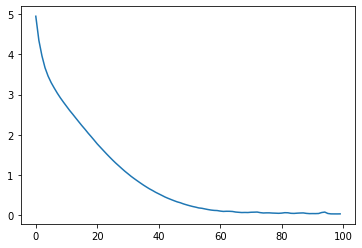

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss)
plt.show()

# 【問題3】他のクラスの説明

ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。
 - RNN
 - SimpleRNNCell
 - GRUCell
 - LSTMCell
 - StackedRNNCells
 - CuDNNGRU
 - CuDNNLSTM

# RNN

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L212

RNN（Recurrent Neural Network）： 時系列データに対応したニューラルネットワーク。時系列のデータポイントは、各層の入力として利用される。また、各層の出力は、次の層の入力としてだけでなく、ユーザーが使用可能な出力としても利用される

cell: RNN cellインスタンス．RNN cellは以下の属性を持つクラスです．

call(input_at_t, states_at_t)メソッド，これは(output_at_t, states_at_t_plus_1)を返します． cellのメソッド呼び出しはオプションの引数constantsも使えます． 下記の「外部定数を渡す場合の注意」を参照してください．

state_size属性． これは1つの整数（1つの状態）でもよく，その場合はrecurrent stateのサイズになります（これはcellの出力のサイズと同じである必要があります）． （1つ状態につき1つのサイズが対応するように）整数やリストやタプルもとれます． この場合は最初のエントリ(state_size[0])がcellの出力のサイズと同じである必要があります． cellをRNN cellインスタンスのリストとすることも可能です． この場合，cellはRNNの中で他のcellの後にスタックされているいれば，効率的なstacked RNNが実現されます．

return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．

return_state: 真理値．出力とともに，最後の状態を返すかどうか．

go_backwards: 真理値（デフォルトはFalse）．Trueなら，入力系列を逆向きから処理し，逆順の系列を返します．

stateful: 真理値（デフォルトはFalse）．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われます．

unroll: 真理値（デフォルトはFalse）．Trueなら，ネットワークは展開され， そうでなければシンボリックループが使われます． 展開はよりメモリ集中傾向になりますが，RNNをスピードアップできます． 展開は短い系列にのみ適しています．

input_dim: 入力の次元（整数）． この引数（または代わりのキーワード引数input_shape）は， このレイヤーをモデルの最初のレイヤーとして利用するときに必要です．

input_length: 入力系列の長さ． この引数はこのレイヤーの後にFlattenからDenseレイヤーへ接続する際に必要です (これがないと，denseの出力のshapeを計算できません)． Recurrentレイヤーがモデルの最初のレイヤーでなければ， 最初のレイヤーのレベルで入力系列の長さを指定する必要があります （例えばinput_shape引数を通じて）．

# SimpleRNNCell

SimpleRNNのCellクラス

SimpleRNNとは、ある時点の状態を次の状態の入力値として扱うことができるループ構造を持ったニューラルネットワーク。SimpleRNNCellはその隠れ層の１単位で、Tensolfrowにおいてクラスの形で提供されている。

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L782

# GRUCell

GRUレイヤーのためのCellクラス

GRUとはLSTMのゲートを使用するというコンセプトはそのままで、パラメータを削減し、計算時間を短縮できる
GRUCellはその隠れ層の１単位で、Tensolfrowにおいてクラスの形で提供されている。

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L1154

# LSTMCell

LSTMレイヤーのためのcellクラス

LSTMはゲートと呼ばれる仕組みが加わり、そのゲートにより時系列データの長期的な依存関係を学習することができる
LSTMCellはその隠れ層の１単位で、Tensolfrowにおいてクラスの形で提供されている。

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L1728

# StackedRNNCells

RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー

効率的なstacked RNNを実装するために使われます

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L25

# CuDNNGRU

CuDNNを利用した高速なGRU実装

TensorFlowバックエンドを使用して、GPUでのみ実行できる。


https://github.com/keras-team/keras/blob/master/keras/layers/cudnn_recurrent.py#L135

# CuDNNLSTM

CuDNNを利用した高速なLSTM実装

TensorFlowバックエンドを使用して、GPUでのみ実行できる。


https://github.com/keras-team/keras/blob/master/keras/layers/cudnn_recurrent.py#L324

# CuDNN

https://docs.nvidia.com/deeplearning/sdk/cudnn-install/index.html

NVIDIA CUDAディープニューラルネットワークライブラリ（cuDNN）は、ディープニューラルネットワーク用のプリミティブのGPU加速ライブラリです。cuDNNは、順方向および逆方向の畳み込み、プーリング、正規化、アクティベーションレイヤーなどの標準ルーチンの高度に調整された実装を提供します。cuDNNは、NVIDIA Deep Learning SDKの一部です。

世界中のディープラーニング研究者およびフレームワーク開発者は、高性能GPUアクセラレーションをcuDNNに依存しています。低レベルのGPUパフォーマンスチューニングに時間を費やすのではなく、ニューラルネットワークのトレーニングとソフトウェアアプリケーションの開発に集中できます。cuDNNは、広く使用されているディープラーニングフレームワークを高速化し、NVIDIA開発者プログラムのメンバーが無料で利用できます